
Pre-order traversal of the tree:
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0

In-order traversal of the tree:
Node 2: Info=5, Color=black, Left=0, Right=0
Node 1: Info=10, Color=red, Left=2, Right=3
Node 4: Info=15, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 5: Info=30, Color=red, Left=0, Right=0

Post-order traversal of the tree:
Node 2: Info=5, Color=black, Left=0, Right=0
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 1: Info=10, Color=red, Left=2, Right=3


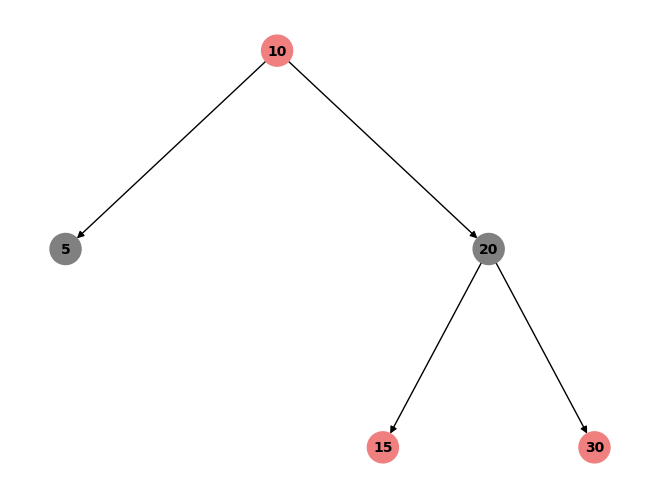


Counts of Operations:
Node Allocations: 5
Rotations: 0
In-order Traversals: 5
Pre-order Traversals: 5
Post-order Traversals: 5


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Constants for indices in the node
INFO = 0
LEFT = 1
RIGHT = 2
COLOR = 3
NULL = 0  # Using 0 as null

# Initialize the tree array and counters
def initialize_tree(size=1001):
    global traversal_count, rotation_count, allocation_count
    traversal_count = {'inorder': 0, 'preorder': 0, 'postorder': 0}
    rotation_count = 0
    allocation_count = 0
    
    tree = [[0, 0, 0, ''] for _ in range(size)]  # Initialize with 1001 nodes (index 0 + 1000 free nodes)
    tree[0][LEFT] = NULL  # Root starts as empty (0)
    tree[0][RIGHT] = 1  # Free list starts at node 1
    for i in range(1, size - 1):
        tree[i][RIGHT] = i + 1  # Link all free nodes
    tree[size - 1][RIGHT] = NULL  # Last free node points to null
    return tree

# Expand the tree with 1000 more nodes
def expand_tree(tree):
    current_size = len(tree)
    tree.extend([[0, 0, 0, ''] for _ in range(1000)])  # Expand by 1000
    new_size = len(tree)
    free_head = current_size  # New free list starts at the old end
    tree[0][RIGHT] = free_head  # Point free list head to the new start
    for i in range(free_head, new_size - 1):
        tree[i][RIGHT] = i + 1  # Link all new free nodes
    tree[new_size - 1][RIGHT] = NULL  # Last new node points to null

# Allocate a new node from the free list
def allocate_node(tree):
    global allocation_count
    free_head = tree[0][RIGHT]
    if free_head == NULL:
        expand_tree(tree)  # If no free nodes, expand the tree
        free_head = tree[0][RIGHT]
    tree[0][RIGHT] = tree[free_head][RIGHT]  # Move the free list head to the next node
    tree[free_head] = [0, NULL, NULL, '']  # Reset the new node
    allocation_count += 1  # Increment allocation count
    return free_head

# Insert a new node into the tree
def insert_node(tree, value, color='black'):
    global rotation_count
    new_node = allocate_node(tree)
    tree[new_node][INFO] = value
    tree[new_node][COLOR] = color

    # Insert into the tree (binary search tree logic for simplicity)
    root = tree[0][LEFT]
    if root == NULL:
        tree[0][LEFT] = new_node  # Set the root if the tree is empty
        return

    current = root
    while True:
        if value < tree[current][INFO]:  # Go to the left
            if tree[current][LEFT] == NULL:
                tree[current][LEFT] = new_node
                break
            else:
                current = tree[current][LEFT]
        else:  # Go to the right
            if tree[current][RIGHT] == NULL:
                tree[current][RIGHT] = new_node
                break
            else:
                current = tree[current][RIGHT]

    # Increment rotation count for balancing (if applicable)
    # This is a placeholder; replace with actual rotation logic
    rotation_count += 0  # Example: adjust based on actual rotations

# In-order traversal to display the tree
def inorder_traversal(tree, node, result=[]):
    global traversal_count
    if node == NULL:
        return
    traversal_count['inorder'] += 1
    inorder_traversal(tree, tree[node][LEFT], result)
    result.append(tree[node][INFO])
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    inorder_traversal(tree, tree[node][RIGHT], result)

# Pre-order traversal to display the tree
def preorder_traversal(tree, node, result=[]):
    global traversal_count
    if node == NULL:
        return
    traversal_count['preorder'] += 1
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    result.append(tree[node][INFO])
    preorder_traversal(tree, tree[node][LEFT], result)
    preorder_traversal(tree, tree[node][RIGHT], result)

# Post-order traversal to display the tree
def postorder_traversal(tree, node, result=[]):
    global traversal_count
    if node == NULL:
        return
    traversal_count['postorder'] += 1
    postorder_traversal(tree, tree[node][LEFT], result)
    postorder_traversal(tree, tree[node][RIGHT], result)
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    result.append(tree[node][INFO])

# Visualization function using networkx with hierarchical tree layout
def visualize_tree(tree):
    G = nx.DiGraph()  # Directed graph for tree
    root = tree[0][LEFT]
    pos = {}  # Dictionary to store positions of nodes

    def add_edges(node, x=0, y=0, x_offset=1):
        if node == NULL:
            return
        pos[tree[node][INFO]] = (x, y)  # Assign position based on x and y coordinates
        left_child = tree[node][LEFT]
        right_child = tree[node][RIGHT]

        if left_child != NULL:
            G.add_edge(tree[node][INFO], tree[left_child][INFO])
            add_edges(left_child, x - x_offset, y - 1, x_offset / 2)  # Move left child to the left
        if right_child != NULL:
            G.add_edge(tree[node][INFO], tree[right_child][INFO])
            add_edges(right_child, x + x_offset, y - 1, x_offset / 2)  # Move right child to the right

    # Start adding edges from the root
    add_edges(root)

    # Get colors for nodes based on their color attribute
    node_colors = ['gray' if tree[node][COLOR] == 'black' else 'lightcoral' if tree[node][COLOR] == 'red' else tree[node][COLOR] for node in range(1, len(tree)) if tree[node][INFO] != 0]

    # Draw the tree with specified positions
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10, font_weight="bold", arrows=True)
    plt.show()

# Example usage
tree = initialize_tree()

# Insert values into the tree
insert_node(tree, 10, 'red')
insert_node(tree, 5, 'black')
insert_node(tree, 20, 'black')
insert_node(tree, 15, 'red')
insert_node(tree, 30, 'red')

# Display the tree using pre-order traversal
print("\nPre-order traversal of the tree:")
preorder_traversal(tree, tree[0][LEFT])

# Display the tree using in-order traversal
print("\nIn-order traversal of the tree:")
inorder_traversal(tree, tree[0][LEFT])

# Display the tree using post-order traversal
print("\nPost-order traversal of the tree:")
postorder_traversal(tree, tree[0][LEFT])

# Visualize the tree with enforced hierarchy
visualize_tree(tree)

# Print the counts of operations
print(f"\nCounts of Operations:")
print(f"Node Allocations: {allocation_count}")
print(f"Rotations: {rotation_count}")
print(f"In-order Traversals: {traversal_count['inorder']}")
print(f"Pre-order Traversals: {traversal_count['preorder']}")
print(f"Post-order Traversals: {traversal_count['postorder']}")
